Импор необходимых библиоттек.

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from google.colab.patches import cv2_imshow
import cv2

Две функции - создание модели и предсказание по изображению.


In [ ]:
def createModel(modelPath, imageSize=(50, 200)):
  model = keras.models.load_model(modelPath)
  return imageSize, model


def checkPicture(imgPath, imageSize=(50, 200)):
  img = keras.preprocessing.image.load_img(imgPath, target_size=imageSize)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  answer = str("This image is %.2f percent Display || %.2f percent Handwritten || %.2f percent Monospaced || %.2f percent Sans Serif || %.2f percent Serif."
      % (100 * score[0], 100 * score[1], 100 * score[2], 100 * score[3], 100 * score[4]))
  # print(score)
  # print(answer)
  return answer

# Сеть №1

In [ ]:
import urllib.request
logo = urllib.request.urlopen("https://drive.google.com/uc?id=11wr7gI-qe_MUHG_hIlJM4edKPKTuLph6&export=download").read()
f = open("model.h5", "wb")
f.write(logo)
f.close()

imageSize, model = createModel(
    '/content/model.h5'
    )

# Сеть №2

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=13tJS3g0FsQjtm5aoyWpu1JJR0zUlHGr3&export=download").read()
f = open("model.h5", "wb")
f.write(logo)
f.close()

imageSize, model = createModel(
    '/content/model.h5'
    )

In [ ]:
# imageSize, model = createModel(
#     '/content/drive/MyDrive/colabData/fontData/models/txtClassification/txtClassification_at_76#0.981-0.906.h5'
#     )

This image is 16.95 percent Display || 0.00 percent Handwritten || 0.00 percent Monospaced || 83.05 percent Sans Serif || 0.00 percent Serif. 



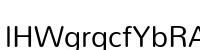

In [ ]:
picturePath = '/content/download.png'
print(checkPicture(picturePath, imageSize), '\n')
cv2_imshow(cv2.imread(picturePath))

wnload.png This image is 0.00 percent Display || 0.00 percent Handwritten || 0.00 percent Monospaced || 0.00 percent Sans Serif || 100.00 percent Serif. 



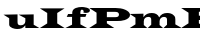

In [ ]:
folder_path = '/content/test'
lenMsg = 10
files = 10
for fname in os.listdir(folder_path)[:files]:
  fname = folder_path +'/'+fname
  print(fname[-lenMsg:], checkPicture(fname, imageSize), '\n')
  cv2_imshow(cv2.imread(fname))